<div align="center"> 
    <h3><font color='blue'>CSE 574 Sections C&D: Introduction to Machine Learning, Spring 2022 </font></h3>
    <h1> Assignment 3 </h1>
    <h2> Part 1 : Building a Basic NN </h2>
    <h4> Submitted By : Akanksha Das & Rahat Bhalla </h4>

<p>"I (We) certify that the code and data in this assignment were generated independently,using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."</p>
</div>

In [35]:
#Importing Necessary Libraries for Implementing Part 1
import math
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plotter
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

<b>Importing Income Data CSV using Pandas:<b>

In [36]:
incomeData = pd.read_csv('income_dataset.csv')
incomeDataFrame = pd.DataFrame(incomeData)

samples,attributes = incomeDataFrame.shape
print('\nNo of Samples: {0} and No of Attributes: {1}'.format(samples,attributes))


No of Samples: 32561 and No of Attributes: 15


<b>Analyzing Attributes of Given Data:<b>

In [37]:
attributeList = incomeDataFrame.columns

print('\nColumns in Dataframe and their Imported Data Type:\n')
for i in range(len(attributeList.values)):
    print('Column {0} is \'{1}\' and of data type: {2}'.format(i+1,attributeList.values[i],incomeDataFrame[attributeList.values[i]].dtype))
   


Columns in Dataframe and their Imported Data Type:

Column 1 is 'age' and of data type: int64
Column 2 is 'workclass' and of data type: object
Column 3 is 'fnlwgt' and of data type: int64
Column 4 is 'education' and of data type: object
Column 5 is 'education.num' and of data type: int64
Column 6 is 'marital.status' and of data type: object
Column 7 is 'occupation' and of data type: object
Column 8 is 'relationship' and of data type: object
Column 9 is 'race' and of data type: object
Column 10 is 'sex' and of data type: object
Column 11 is 'capital.gain' and of data type: int64
Column 12 is 'capital.loss' and of data type: int64
Column 13 is 'hours.per.week' and of data type: int64
Column 14 is 'native.country' and of data type: object
Column 15 is 'income' and of data type: object


**Analysis various statistical values of the dataframe**

In [38]:
print(f"\nThe mean of the dataframe is:\n\n {incomeDataFrame.mean()}")
print(f"\nThe median of the dataframe is:\n\n {incomeDataFrame.median()}")
print(f"\nThe mode of the dataframe Attributes \'Age\', \'hours per week \' and \'Number of Education Years\'is:\n\n {incomeDataFrame[['age','hours.per.week','education.num']].mode()}")


The mean of the dataframe is:

 age                   38.581647
fnlwgt            189778.366512
education.num         10.080679
capital.gain        1077.648844
capital.loss          87.303830
hours.per.week        40.437456
dtype: float64

The median of the dataframe is:

 age                   37.0
fnlwgt            178356.0
education.num         10.0
capital.gain           0.0
capital.loss           0.0
hours.per.week        40.0
dtype: float64

The mode of the dataframe Attributes 'Age', 'hours per week ' and 'Number of Education Years'is:

    age  hours.per.week  education.num
0   36              40              9


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


<b>Determining number of samples missing attributes and how many:<b>

In [39]:
#Check How many attributes are missing information

print('\n~~Checking for Samples with Missing Data~~\n')
print('Total Number of Samples is:',samples,'\n')
attributesWithMissingValues=0
incomeDataFrame=incomeDataFrame.replace('?',pd.NA)

for i in range(len(attributeList)):
    dataCount = incomeDataFrame[attributeList[i]].count()
    if samples-dataCount>0:
        print("No of Samples in data set with missing attribute '{0}' are: {1}".format(attributeList[i],samples-dataCount))
        attributesWithMissingValues=attributesWithMissingValues+1

print("\nNo of Columns that have missing values:",attributesWithMissingValues)



~~Checking for Samples with Missing Data~~

Total Number of Samples is: 32561 

No of Samples in data set with missing attribute 'workclass' are: 1836
No of Samples in data set with missing attribute 'occupation' are: 1843
No of Samples in data set with missing attribute 'native.country' are: 583

No of Columns that have missing values: 3


<b>Updating Attributes that have type object to Category:<b>

In [40]:
for i in range(len(attributeList)):
    if incomeDataFrame[attributeList[i]].dtype=='object':
        incomeDataFrame[attributeList[i]]=incomeDataFrame[attributeList[i]].astype('category')
        print('Updating type for :',attributeList[i],'to ',incomeDataFrame[attributeList[i]].dtype)



Updating type for : workclass to  category
Updating type for : education to  category
Updating type for : marital.status to  category
Updating type for : occupation to  category
Updating type for : relationship to  category
Updating type for : race to  category
Updating type for : sex to  category
Updating type for : native.country to  category
Updating type for : income to  category


<b>Dropping Samples with N/A Values<b>

In [41]:
incomeDataFrame=incomeDataFrame.dropna()
samples,attributes = incomeDataFrame.shape
print('Total Number of Samples After Dropping is:',samples,'\n')


Total Number of Samples After Dropping is: 30162 



<b>Plot of Education Qualification of Samples<b>

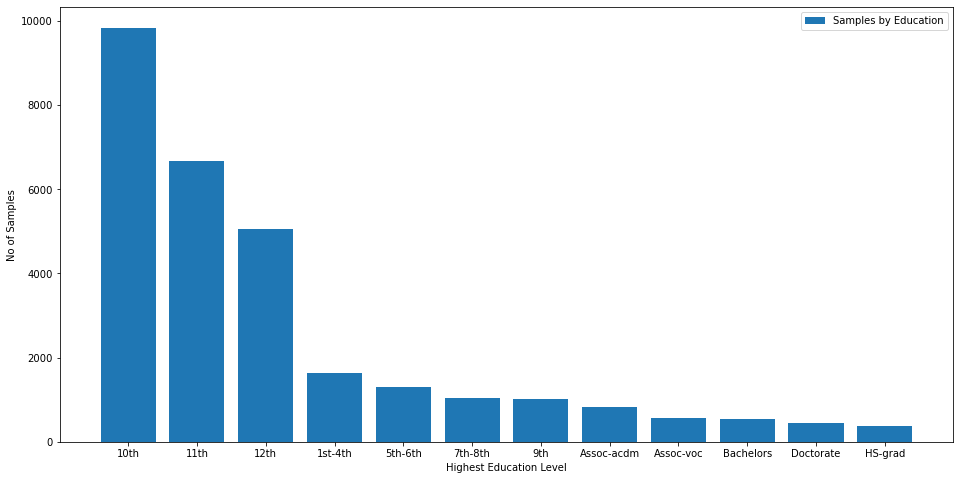

In [42]:
d=incomeDataFrame['education'].value_counts()
y=d.index.categories.values[range(12)]
x=d.values[range(12)]

plotter.figure(figsize=(16,8))
plotter.bar(y,x, label='Samples by Education')
plotter.xlabel('Highest Education Level')
plotter.ylabel('No of Samples')
plotter.legend()
plotter.show()

<b>Plot of Top Employers<b>

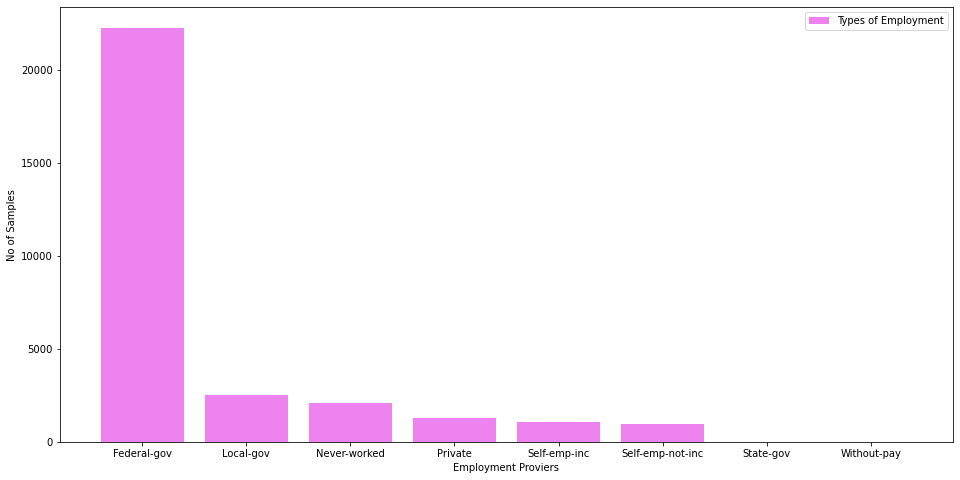

In [43]:
d=incomeDataFrame['workclass'].value_counts()
y=d.index.categories.values
x=d.values

plotter.figure(figsize=(16,8))
plotter.bar(y,x, label='Types of Employment',color='violet')
plotter.xlabel('Employment Proviers')
plotter.ylabel('No of Samples')
plotter.legend()
plotter.show()

<b>Plot of Most Employable Occupations<b>

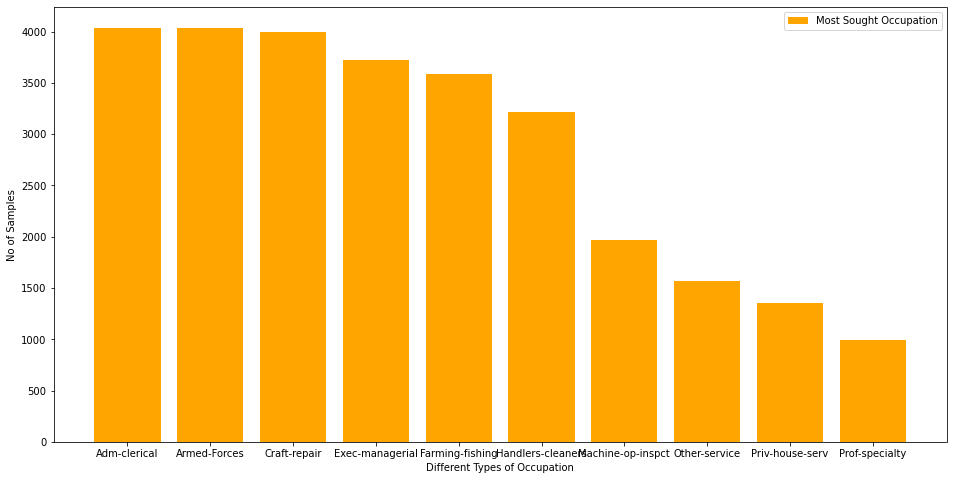

In [44]:
d=incomeDataFrame['occupation'].value_counts()
y=d.index.categories.values[range(10)]
x=d.values[range(10)]

plotter.figure(figsize=(16,8))
plotter.bar(y,x, label='Most Sought Occupation',color='orange')
plotter.xlabel('Different Types of Occupation')
plotter.ylabel('No of Samples')
plotter.legend()
plotter.show()

<b>Renaming the Values of Attribute 'Income' so we may easily classify:<b>

In [45]:
print('No of Categories for attribute, \'Income\':',len(incomeDataFrame.income.cat.categories.array))
print('The Categories are:')
for counter in range(len(incomeDataFrame.income.cat.categories.array)):
    print(incomeDataFrame.income.cat.categories.array[counter])
    
print('Re-naming categories , changing <=50K to 0 and >50K to 1')
incomeDataFrame['income']=incomeDataFrame.income.cat.rename_categories([0,1])


No of Categories for attribute, 'Income': 2
The Categories are:
<=50K
>50K
Re-naming categories , changing <=50K to 0 and >50K to 1


<b>Converting Other Category attributes to Numerical Codes for Computation:<b>

In [46]:

incomeDataFrame['workclass']=incomeDataFrame.workclass.cat.codes
incomeDataFrame['occupation']=incomeDataFrame.occupation.cat.codes
incomeDataFrame['race']=incomeDataFrame.race.cat.codes
incomeDataFrame['sex']=incomeDataFrame.sex.cat.codes
incomeDataFrame['native.country']=incomeDataFrame['native.country'].cat.codes
incomeDataFrame['relationship']=incomeDataFrame['relationship'].cat.codes
incomeDataFrame['marital.status']=incomeDataFrame['marital.status'].cat.codes
incomeDataFrame['education']=incomeDataFrame['education'].cat.codes
#incomeDataFrame['income']=incomeDataFrame['income'].cat.codes



In [47]:
attributes = ['age','workclass','education.num','occupation','race','sex','native.country','capital.loss','hours.per.week','relationship','marital.status','fnlwgt','education','capital.gain']
#attributes = ['age','workclass','education.num','education','occupation','race','income','hours.per.week','native.country']
for attributeCounter in range(len(attributes)):
    maxValue = incomeDataFrame[attributes[attributeCounter]].max()
    minValue = incomeDataFrame[attributes[attributeCounter]].min()
    incomeDataFrame[attributes[attributeCounter]]=(incomeDataFrame[attributes[attributeCounter]]-minValue)/(maxValue-minValue)


<b>Splitting Given Data Set into Training and Testing Set<b>

In [48]:
incomeDataFrame = incomeDataFrame.sample(frac=1).reset_index(drop=True)
featureVector = incomeDataFrame[['age','workclass','education.num','occupation','race','sex','native.country','capital.loss','hours.per.week','relationship','marital.status','fnlwgt','education','capital.gain']]
actualLabelVector = incomeDataFrame['income'].astype('float64')

#featureVector=incomeDataFrame[['age','workclass','education.num','education','occupation','race','income','hours.per.week','native.country']]
#actualLabelVector = incomeDataFrame['sex'].astype('float64')
trainingSetSampleSize = math.floor(0.8*samples)
print('No of Samples in Training Set:',trainingSetSampleSize)

X_Train = featureVector.iloc[:trainingSetSampleSize,:]
Y_Train_Label = actualLabelVector.iloc[:trainingSetSampleSize]

X_Test = featureVector.iloc[trainingSetSampleSize:,:]
Y_Test_Label = actualLabelVector.iloc[trainingSetSampleSize:]

print(X_Train.shape,':',Y_Train_Label.shape)
print(X_Test.shape,':',Y_Test_Label.shape)



No of Samples in Training Set: 24129
(24129, 14) : (24129,)
(6033, 14) : (6033,)


<b>Implementing NN Model<b>

In [57]:
neuralNetworkModel = keras.Sequential([
    keras.layers.Dense(30, input_shape=(14,),activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

neuralNetworkModel.compile(optimizer='adam',
                           loss='binary_crossentropy',
                          metrics=['accuracy'])
trainingResults = neuralNetworkModel.fit(X_Train,Y_Train_Label,validation_data=(X_Test,Y_Test_Label),batch_size=32,epochs=100)


Train on 24129 samples, validate on 6033 samples
Epoch 1/100
24129/24129 [==============================] - 4s 156us/sample - loss: 0.4906 - accuracy: 0.7674 - val_loss: 0.4165 - val_accuracy: 0.8095
Epoch 2/100
24129/24129 [==============================] - 3s 104us/sample - loss: 0.3853 - accuracy: 0.8223 - val_loss: 0.3615 - val_accuracy: 0.8313
Epoch 3/100
24129/24129 [==============================] - 2s 103us/sample - loss: 0.3546 - accuracy: 0.8341 - val_loss: 0.3453 - val_accuracy: 0.8372
Epoch 4/100
24129/24129 [==============================] - 2s 103us/sample - loss: 0.3450 - accuracy: 0.8365 - val_loss: 0.3396 - val_accuracy: 0.8400
Epoch 5/100
24129/24129 [==============================] - 3s 113us/sample - loss: 0.3413 - accuracy: 0.8378 - val_loss: 0.3532 - val_accuracy: 0.8347
Epoch 6/100
24129/24129 [==============================] - 4s 168us/sample - loss: 0.3405 - accuracy: 0.8384 - val_loss: 0.3438 - val_accuracy: 0.8400
Epoch 7/100
24129/24129 [====================

24129/24129 [==============================] - 3s 109us/sample - loss: 0.3183 - accuracy: 0.8494 - val_loss: 0.3309 - val_accuracy: 0.8500
Epoch 54/100
24129/24129 [==============================] - 2s 102us/sample - loss: 0.3179 - accuracy: 0.8497 - val_loss: 0.3328 - val_accuracy: 0.8480
Epoch 55/100
24129/24129 [==============================] - 2s 103us/sample - loss: 0.3176 - accuracy: 0.8498 - val_loss: 0.3303 - val_accuracy: 0.8497
Epoch 56/100
24129/24129 [==============================] - 2s 99us/sample - loss: 0.3190 - accuracy: 0.8506 - val_loss: 0.3314 - val_accuracy: 0.8465
Epoch 57/100
24129/24129 [==============================] - 3s 106us/sample - loss: 0.3173 - accuracy: 0.8513 - val_loss: 0.3309 - val_accuracy: 0.8515
Epoch 58/100
24129/24129 [==============================] - 3s 111us/sample - loss: 0.3175 - accuracy: 0.8519 - val_loss: 0.3375 - val_accuracy: 0.8473
Epoch 59/100
24129/24129 [==============================] - 2s 100us/sample - loss: 0.3186 - accuracy:

In [58]:
trainingAccuracy = neuralNetworkModel.evaluate(X_Train,Y_Train_Label,verbose=0)
testingAccuracy = neuralNetworkModel.evaluate(X_Test,Y_Test_Label,verbose=0)
print('\n\n')
print('\nTraining Accuracy: ',trainingAccuracy[1])
print('\nTest Accuracy: ',testingAccuracy[1])





Training Accuracy:  0.8554851

Test Accuracy:  0.8514835


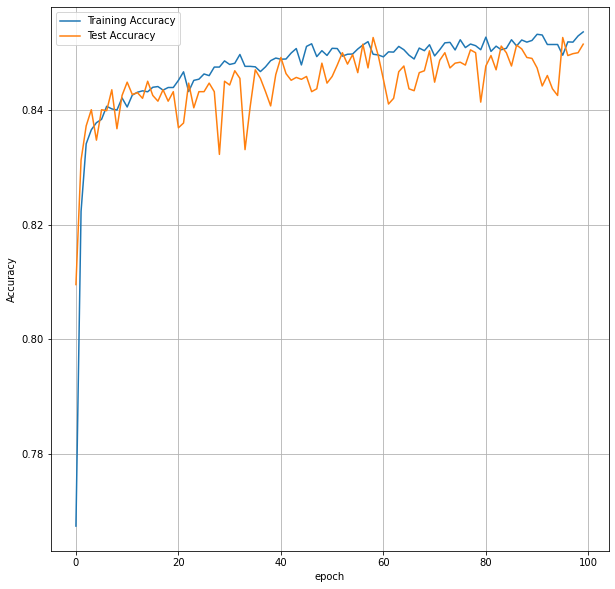

In [59]:
plotter.figure(figsize=(10,10))
plotter.plot(trainingResults.history['accuracy'], label='Training Accuracy')
plotter.plot(trainingResults.history['val_accuracy'], label='Test Accuracy')
plotter.xlabel('epoch')
plotter.ylabel('Accuracy')
plotter.legend()
plotter.grid()
plotter.show()

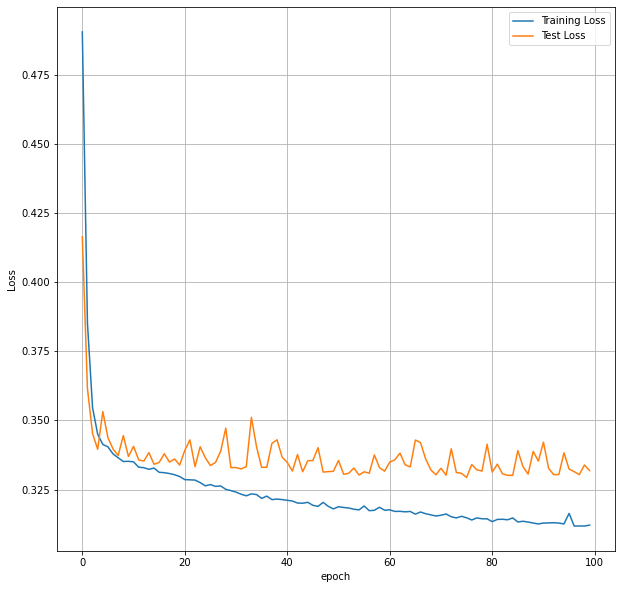

In [60]:
plotter.figure(figsize=(10,10))
plotter.plot(trainingResults.history['loss'], label='Training Loss')
plotter.plot(trainingResults.history['val_loss'], label='Test Loss')
plotter.xlabel('epoch')
plotter.ylabel('Loss')
plotter.legend()
plotter.grid()
plotter.show()